<a href="https://colab.research.google.com/github/yuva-01997656/cs480student/blob/01/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

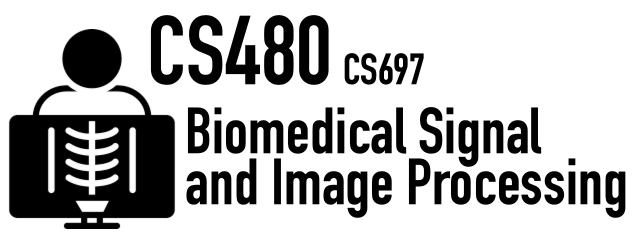
# Assignment 1


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [ ]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [ ]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

(-2.0, 2.0)

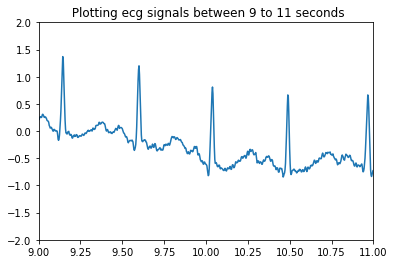

In [ ]:
t = np.arange(ecg.size) / SAMPLING_RATE

pylab.title(" Plotting ecg signals between 9 to 11 seconds")
pylab.plot(t,ecg)
pylab.xlim(9,11)
pylab.ylim(-2,2)


**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [ ]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 1.1 MB 5.0 MB/s 


In [ ]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


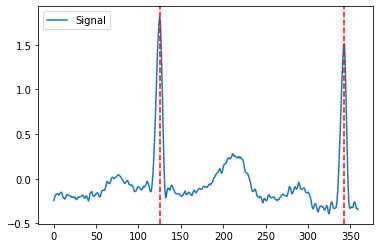

In [ ]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [ ]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

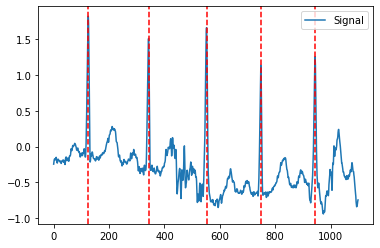

In [ ]:
Task2 = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg[0:1100])

Within the range of ecg signals 0 to 1100, there are 5 spikes between 9 and 11 seconds, which I depicted above.


**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

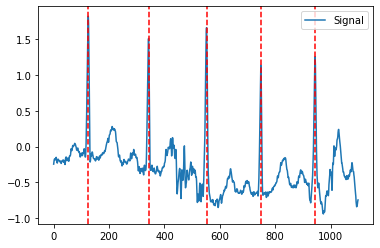

In [ ]:
Task3 = nk.events_plot(rpeaks['ECG_R_Peaks'][0:5], ecg[0:1100])

In [ ]:
pip install heartpy

     |████████████████████████████████| 1.0 MB 4.7 MB/s 


In [ ]:
import heartpy as hp
work_data, measure = hp.process(ecg, SAMPLING_RATE )

for item in measure:
    print(item,":", measure[item])

bpm : 103.06551628394845
ibi : 582.1539750957854
sdnn : 76.1498523954714
sdsd : 77.52620235069179
rmssd : 102.8033411674991
pnn20 : 0.6446469248291572
pnn50 : 0.4145785876993166
hr_mad : 33.33333333333337
sd1 : 72.68651515197051
sd2 : 76.06672021612641
s : 17369.943729481718
sd1/sd2 : 0.9555626290373528
breathingrate : 0.16666666666666666


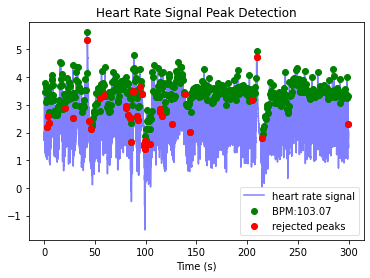

In [ ]:
hp.plotter(work_data, measure)

Any human's normal heart rate should be between 60 and 120 beats per minute. The BPM = 103.07, which is somewhat higher than typical, can be seen in the graph above. As a result, the Heart Rate is slightly higher than normal.


**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

In [ ]:
# TODO Does the detection work well?

In [ ]:
# Delineate the ECG signal
_, wave_peaks = nk.ecg_delineate(ecg, rpeaks, sampling_rate=SAMPLING_RATE, method="peak")




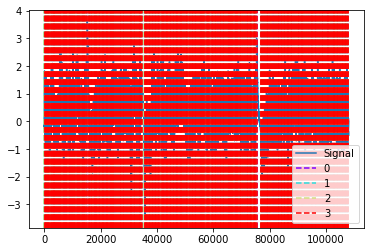

In [ ]:
# Visualizing all the T-peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([wave_peaks['ECG_T_Peaks'],
                       wave_peaks['ECG_P_Peaks'],
                       wave_peaks['ECG_Q_Peaks'],
                       wave_peaks['ECG_S_Peaks']], ecg)

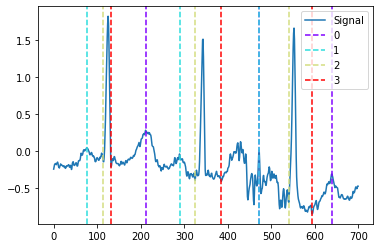

In [ ]:
# Visulizing  first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([wave_peaks['ECG_T_Peaks'][:3],
                       wave_peaks['ECG_P_Peaks'][:3],
                       wave_peaks['ECG_Q_Peaks'][:3],
                       wave_peaks['ECG_S_Peaks'][:3]], ecg[:700])

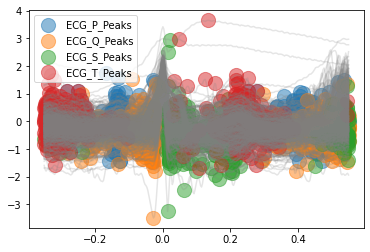

In [ ]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, wave_peaks = nk.ecg_delineate(ecg, rpeaks, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

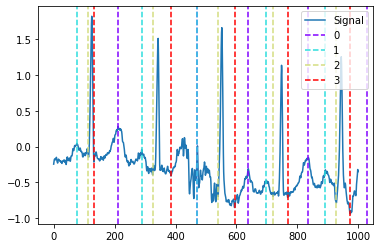

In [ ]:
plot = nk.events_plot([wave_peaks['ECG_T_Peaks'][:5],
                       wave_peaks['ECG_P_Peaks'][:5],
                       wave_peaks['ECG_Q_Peaks'][:5],
                       wave_peaks['ECG_S_Peaks'][:5]], ecg[:1000])

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [ ]:
filtered_ecg = nk.signal_filter(ecg, sampling_rate=SAMPLING_RATE, lowcut=5, highcut=100, method="butterworth", order=2,window_size="default",powerline=50 )

In [ ]:
# Delineate the ECG signal
_, wave_peaks2 = nk.ecg_delineate(filtered_ecg, rpeaks, sampling_rate=SAMPLING_RATE, method="peak")

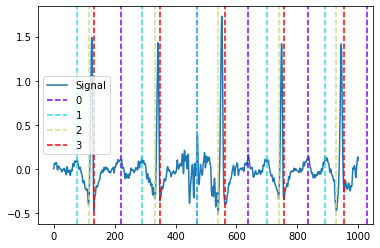

In [ ]:
plot = nk.events_plot([wave_peaks2['ECG_T_Peaks'][:5],
                       wave_peaks2['ECG_P_Peaks'][:5],
                       wave_peaks2['ECG_Q_Peaks'][:5],
                       wave_peaks2['ECG_S_Peaks'][:5]], filtered_ecg[0:1000])

In [ ]:
# TODO Does the filtering improve the result?

I had used a filter for the ecg signal given with various upper and lower cut and as a result I found that there a small differences in the width of each peak is observed.



In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#

References:
https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset

Git-hub

collaboration: 
worked along with Praveen Ganni.
